# AI innovation Challenge


The hi-tech company sells service contract to customers to maintain  and support their products and their goal is 100% renewal of all the service contracts for the life of the products. The service contract renewals could potentially account for $X billion annually in recurring revenue

# Challenge
The challenge is to use the AI and Machine Learning to predict service renewals for the company? Which product instance will have their service contracts renewal next time? What are the primary drivers for service renewals?


# Dataset

•	SampleData.tsv [10k rows of data]

In [276]:
library(readr) ## read_tsv
library(dplyr)
library(caTools)
library(caret)
library(e1071)
library(grid)
library(gridExtra)
library(rpart)

In [277]:
#library(rpart)


In [278]:
FileName <-"./data/sample_set.tsv"

In [279]:
getwd()

[1] "C:/Users/ajamishr/AIInnovation"

In [280]:
AIdataset <- read_tsv(FileName, na = "N/A")

Parsed with column specification:
cols(
  .default = col_character(),
  ibsa_main_sample_set.innovation_challenge_key = col_integer(),
  ibsa_main_sample_set.product_transaction_type = col_integer(),
  ibsa_main_sample_set.contract_line_start_date = col_date(format = ""),
  ibsa_main_sample_set.contract_line_end_date = col_date(format = ""),
  ibsa_main_sample_set.contract_line_create_date = col_date(format = ""),
  ibsa_main_sample_set.warranty_contract_line_end_date = col_date(format = ""),
  ibsa_main_sample_set.contract_line_reaction_time_code = col_integer(),
  ibsa_main_sample_set.previous_contract_line_end_date = col_date(format = ""),
  ibsa_main_sample_set.sales_hierarchy_level = col_integer(),
  ibsa_main_sample_set.service_sales_node_base_sales_hierarchy_level = col_integer(),
  ibsa_main_sample_set.contract_line_net_usd_amount = col_integer(),
  ibsa_main_sample_set.product_net_price = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(na

In [281]:
head(AIdataset)

ibsa_main_sample_set.innovation_challenge_key,ibsa_main_sample_set.renewed_yorn,ibsa_main_sample_set.instance_id,ibsa_main_sample_set.contract_line_id,ibsa_main_sample_set.minor_line_yorn,ibsa_main_sample_set.major_line_instance_id,ibsa_main_sample_set.installation_date,ibsa_main_sample_set.product_sales_order_type,ibsa_main_sample_set.product_purchase_order_type,ibsa_main_sample_set.instance_status,...,ibsa_main_sample_set.service_distributor_base_theater_name,ibsa_main_sample_set.service_distributor_base_distributor_normalized_name,ibsa_main_sample_set.contract_line_net_usd_amount,ibsa_main_sample_set.product_net_price,ibsa_main_sample_set.sales_node_renewal_rate,ibsa_main_sample_set.customer_renewal_rate,ibsa_main_sample_set.partner_renewal_rate,ibsa_main_sample_set.product_renewal_rate,ibsa_main_sample_set.service_sales_node_installed_base_sales_node_renewal_rate,ibsa_main_sample_set.service_partner_installed_base_partner_renewal_rate
6377987,N,CED2046F45038B444E46B39BDEFCE9CB7723BC3A18B144A7766C19F22EB30D2E,025B4B93C290BB30D46E3BCFD9A2438A83C8C6ECE78F5F3CB7A1FA85218AD24E,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
6019776,N,C32E506BCBC56AFBA803716D76E630A9141FB86ABF80BFB24B1CF967C87A2AA9,85F875950DAE9B6F3C835987B1CB594FD66FCFD26B9656FC6BC0B07236E6F09F,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
380293,N,0C57CB6B18F10E9710D1FD08C579732E6D8497BB11037AF3FEA027AAC4725923,FDDE9B6C347CD673AA030233B2E77E47ADE969CA7A66EFB4BAABDE04FAA4026C,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
4366777,N,8D9CEFB3C70524AF2FD2B9543FC0289766B4298366BB816109C86C1EE3A11862,EBE5DDA92260B430175EE4B240790D34D0A8D15097B9A1DC7BA6CC841853C114,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
7840051,N,FE1BD8A298629EC753E9BD185CA2793C07188CEF05F4B764FA943EFBC32E6460,487471F424BE75F4E504859B7686E4BE23F05252B79A6AC0CD4F51B38AC442F8,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
7562698,N,F525DC7429D1EC9EC3BD1E68C014B8354E58B9DD670A9ED413490FA6EC711C6E,70C31B41DE3BAE9220A9FB103DD01AA761B8FC91131771A6EAF9D6DE670A8CFE,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53


In [282]:
# rename column names by removing the prefix
AIdataset <- AIdataset %>% rename_at(.vars = vars(starts_with("ibsa_main_sample_set.")),   ########################### INPUT ###########################
                                      .funs = funs(sub("ibsa_main_sample_set[.]","",.)))


In [283]:
head(AIdataset)

innovation_challenge_key,renewed_yorn,instance_id,contract_line_id,minor_line_yorn,major_line_instance_id,installation_date,product_sales_order_type,product_purchase_order_type,instance_status,...,service_distributor_base_theater_name,service_distributor_base_distributor_normalized_name,contract_line_net_usd_amount,product_net_price,sales_node_renewal_rate,customer_renewal_rate,partner_renewal_rate,product_renewal_rate,service_sales_node_installed_base_sales_node_renewal_rate,service_partner_installed_base_partner_renewal_rate
6377987,N,CED2046F45038B444E46B39BDEFCE9CB7723BC3A18B144A7766C19F22EB30D2E,025B4B93C290BB30D46E3BCFD9A2438A83C8C6ECE78F5F3CB7A1FA85218AD24E,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
6019776,N,C32E506BCBC56AFBA803716D76E630A9141FB86ABF80BFB24B1CF967C87A2AA9,85F875950DAE9B6F3C835987B1CB594FD66FCFD26B9656FC6BC0B07236E6F09F,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
380293,N,0C57CB6B18F10E9710D1FD08C579732E6D8497BB11037AF3FEA027AAC4725923,FDDE9B6C347CD673AA030233B2E77E47ADE969CA7A66EFB4BAABDE04FAA4026C,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
4366777,N,8D9CEFB3C70524AF2FD2B9543FC0289766B4298366BB816109C86C1EE3A11862,EBE5DDA92260B430175EE4B240790D34D0A8D15097B9A1DC7BA6CC841853C114,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
7840051,N,FE1BD8A298629EC753E9BD185CA2793C07188CEF05F4B764FA943EFBC32E6460,487471F424BE75F4E504859B7686E4BE23F05252B79A6AC0CD4F51B38AC442F8,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53
7562698,N,F525DC7429D1EC9EC3BD1E68C014B8354E58B9DD670A9ED413490FA6EC711C6E,70C31B41DE3BAE9220A9FB103DD01AA761B8FC91131771A6EAF9D6DE670A8CFE,Y,000034B6E823EDAA1E83C89369FA913A5189353886BE3C87F0D3C989FD85E25B,null,Standard Cisco - US,Resale,Latest-INSTALLED,...,NA,A096DD969881554D12B5297CD9DF3CB0C6632E882AA28126C8FC410923A74EDF,0,0,64,NULL,53,NULL,64,53


In [284]:
# Dimesion of dataset
dim(AIdataset)

[1] 10139   237

In [285]:
# Select key features --
ColumnsSelected <- c('innovation_challenge_key','renewed_yorn','installed_product_type','component_type','service_contract_classification',
                     'service_contract_process_type','contract_line_multi_year_discount_yorn','contract_line_route_to_market_code',
                     'product_sales_channel_code','hardware_yorn','service_offering','service_sales_node_base_sub_scms_name',
                     'business_unit','product_type','monetization_type','product_category','software_usage_type',
                     'service_fee_amount','service_product_base_product_sub_group','four_quarter_bookings_band','top_vertical_market_name')


In [286]:
AIdataset <- AIdataset[ColumnsSelected]
head(AIdataset)

innovation_challenge_key,renewed_yorn,installed_product_type,component_type,service_contract_classification,service_contract_process_type,contract_line_multi_year_discount_yorn,contract_line_route_to_market_code,product_sales_channel_code,hardware_yorn,...,service_sales_node_base_sub_scms_name,business_unit,product_type,monetization_type,product_category,software_usage_type,service_fee_amount,service_product_base_product_sub_group,four_quarter_bookings_band,top_vertical_market_name
6377987,N,NONSERIALIZED,CHILD,null,RESALE,N,1-TIER,Value Added Resellers,N,...,COMM_SELECT,UCIBU,APPSWIND,Perpetual,Software,On-Premise,NULL,ECMU,$500k < Tier <= $1m,Media/Entertainment
6019776,N,SERIALIZED,CHILD,null,RESALE,N,1-TIER,Value Added Resellers,N,...,COMM_SELECT,UCIBU,APPSWIND,Perpetual,Software,On-Premise,NULL,ECMU,$500k < Tier <= $1m,Media/Entertainment
380293,N,NONSERIALIZED,CHILD,null,RESALE,N,1-TIER,Value Added Resellers,N,...,COMM_SELECT,UCIBU,APPSWIND,Perpetual,Software,On-Premise,NULL,ECMU,$500k < Tier <= $1m,Media/Entertainment
4366777,N,NONSERIALIZED,CHILD,null,RESALE,N,1-TIER,Value Added Resellers,N,...,COMM_SELECT,UCIBU,APPSWIND,Perpetual,Software,On-Premise,NULL,ECMU,$500k < Tier <= $1m,Media/Entertainment
7840051,N,NONSERIALIZED,CHILD,null,RESALE,N,1-TIER,Value Added Resellers,N,...,COMM_SELECT,UCIBU,APPSWIND,Perpetual,Software,On-Premise,NULL,ECMU,$500k < Tier <= $1m,Media/Entertainment
7562698,N,SERIALIZED,CHILD,null,RESALE,N,1-TIER,Value Added Resellers,N,...,COMM_SELECT,UCIBU,APPSWIND,Perpetual,Software,On-Premise,NULL,ECMU,$500k < Tier <= $1m,Media/Entertainment


In [287]:
# Dimesion of dataset
dim(AIdataset)

[1] 10139    21

In [288]:
ClassDistribution <- cbind(freq=table(AIdataset$renewed_yorn), percentage=prop.table(table(AIdataset$renewed_yorn))*100)
ClassDistribution

,freq,percentage
N,2101,20.72196
null,1514,14.93244
Y,6524,64.34560


In [289]:
sapply(AIdataset,class)

innovation_challenge_key                           renewed_yorn 
                             "integer"                            "character" 
                installed_product_type                         component_type 
                           "character"                            "character" 
       service_contract_classification          service_contract_process_type 
                           "character"                            "character" 
contract_line_multi_year_discount_yorn     contract_line_route_to_market_code 
                           "character"                            "character" 
            product_sales_channel_code                          hardware_yorn 
                           "character"                            "character" 
                      service_offering  service_sales_node_base_sub_scms_name 
                           "character"                            "character" 
                         business_unit                           product_type 
                           "character"                            "character" 
                     monetization_type                       product_category 
                           "character"                            "character" 
                   software_usage_type                     service_fee_amount 
                           "character"                            "character" 
service_product_base_product_sub_group             four_quarter_bookings_band 
                           "character"                            "character" 
              top_vertical_market_name 
                           "character"

In [290]:
ncol(AIdataset)

[1] 21

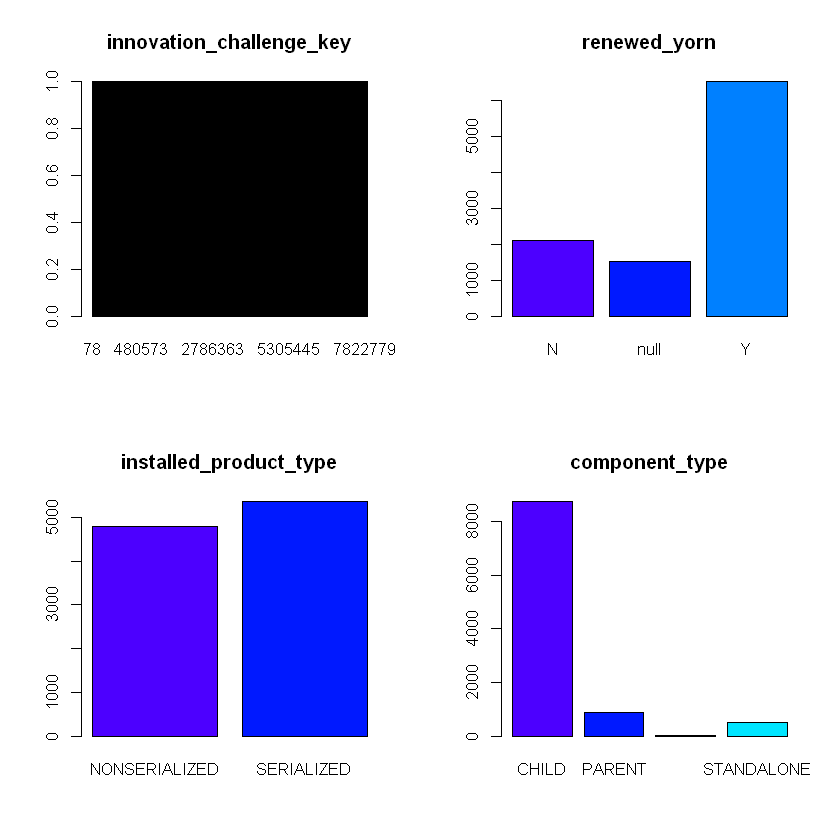

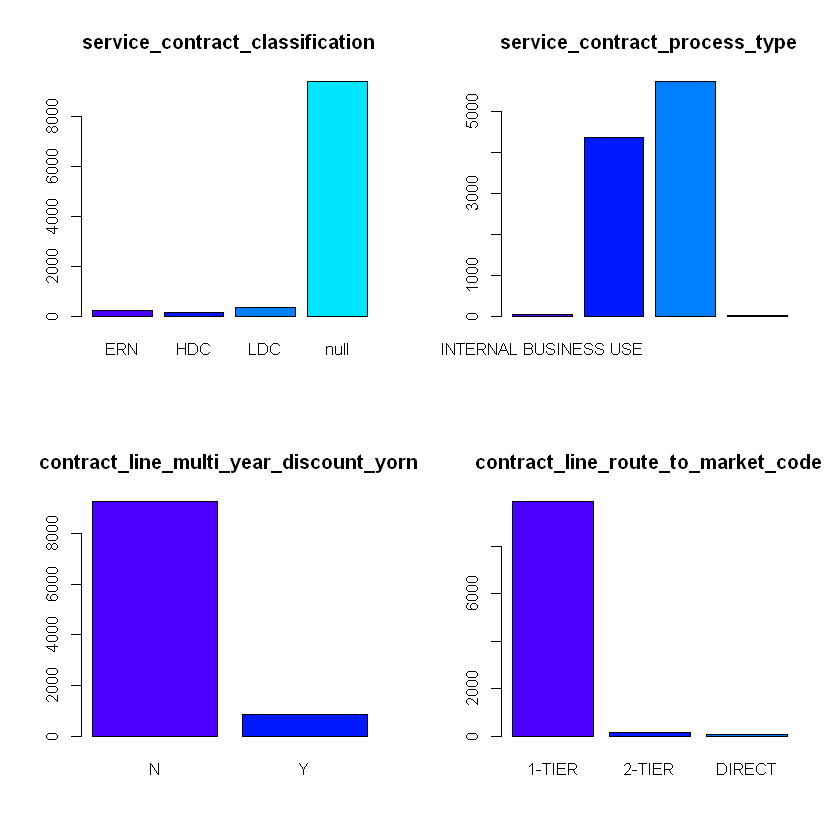

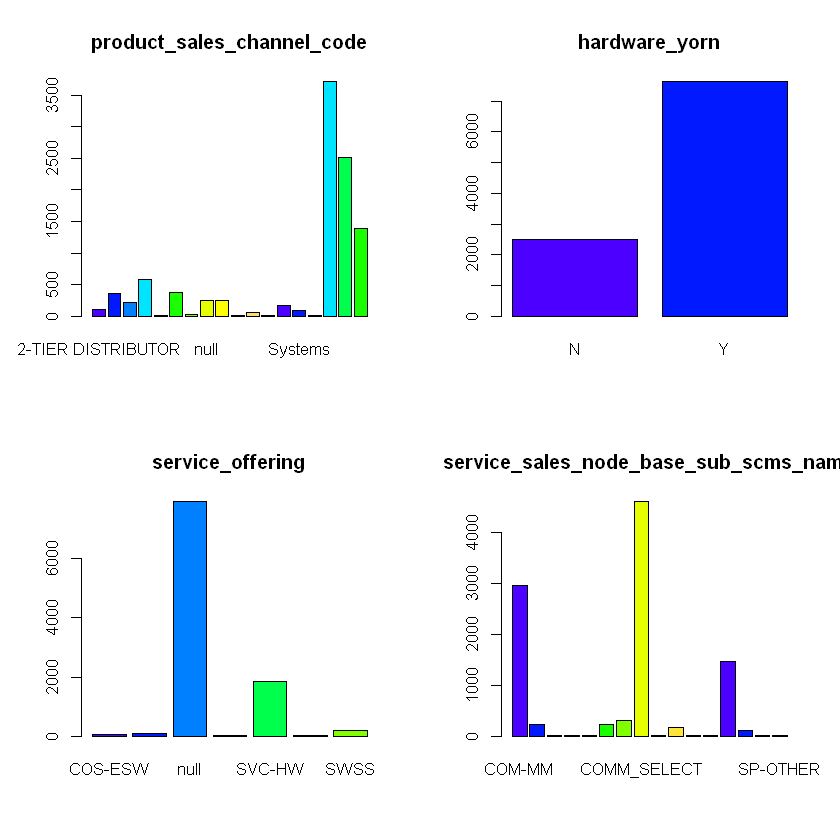

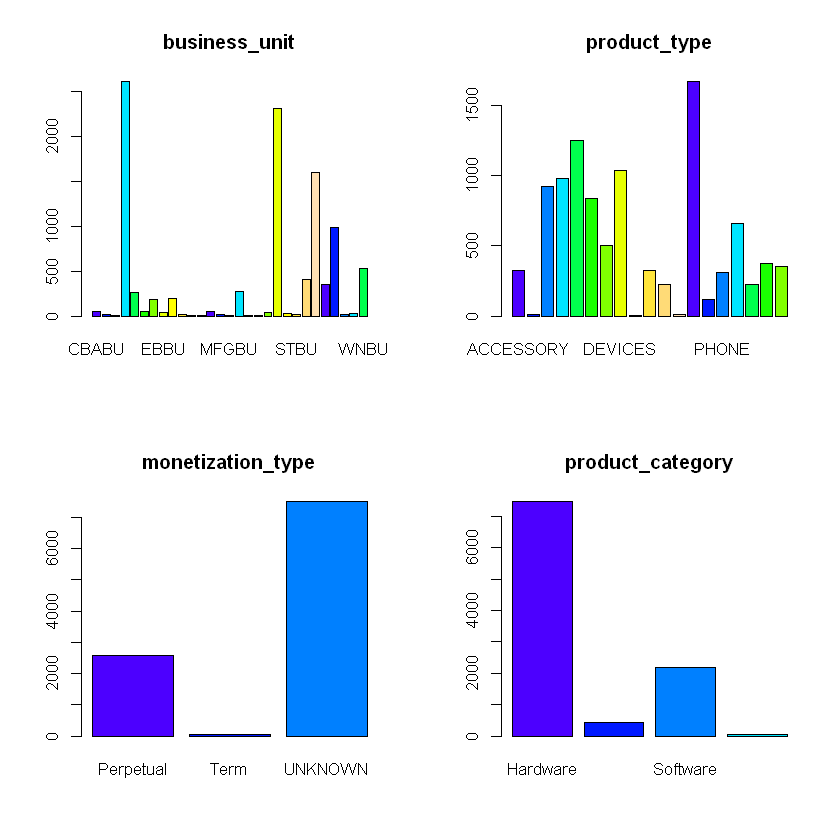

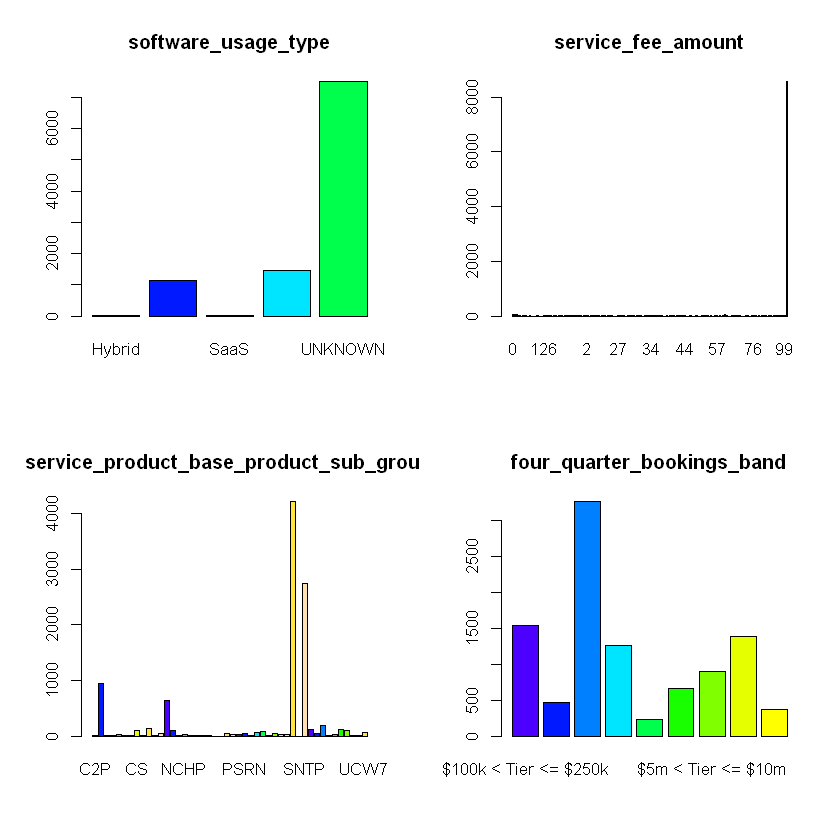

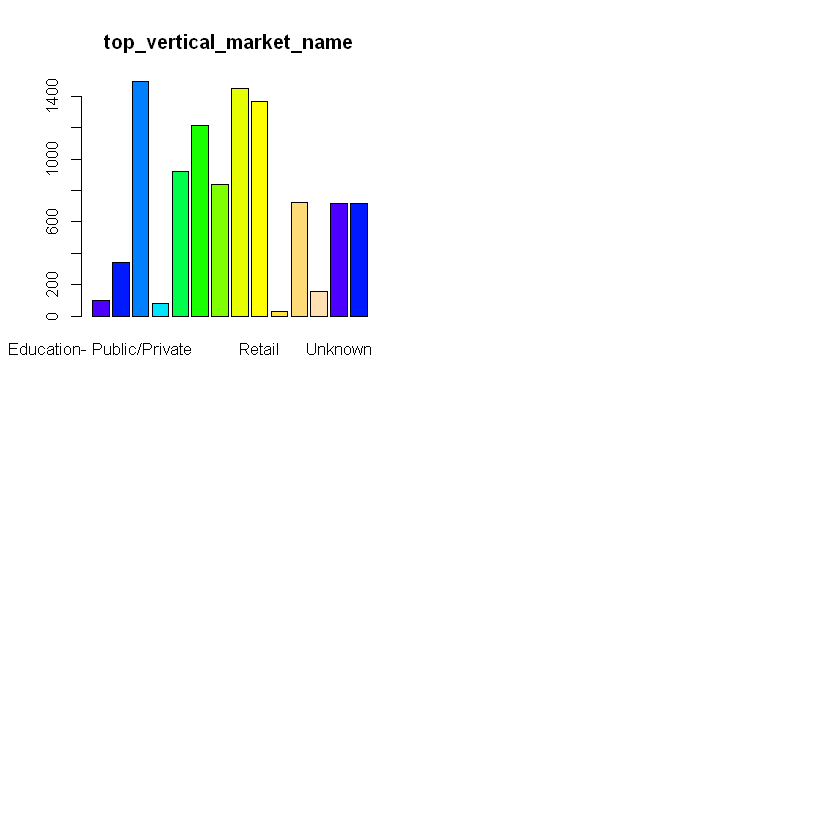

In [291]:
############################ Visualization ################################

#### Print  attributes - LATEST  *******************************************

#dev.copy(png,'predataProcessing.png')
#jpeg('predataProcessing.jpg')

 par(mfrow=c(2,2))
 for(i in 1:ncol(AIdataset)) {
   counts <- table(AIdataset[,i])
   name <- names(AIdataset)[i]
   #barplot(counts, main=name,col = rainbow(12))
   # barplot(counts, main=name,col = c("red","blue","green","orange"))
   barplot(counts, main=name,col = topo.colors(12))
 }
#dev.off()

######################################################################################

In [292]:

# Data clean up and categorization

AIdataset$installed_product_type <- as.factor(ifelse(AIdataset$installed_product_type %in% 'NONSERIALIZED',1,
                                                     ifelse(AIdataset$installed_product_type %in% 'SERIALIZED',2,
                                                            ifelse(AIdataset$installed_product_type %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                   99)
                                                     )
)
)

AIdataset$component_type <- as.factor(ifelse(AIdataset$component_type %in% 'CHILD',1,
                                             ifelse(AIdataset$component_type %in% 'PARENT',2,
                                                    ifelse(AIdataset$component_type %in% 'PARENT-CHILD',3,
                                                           ifelse(AIdataset$component_type %in% 'STANDALONE',4,
                                                                  ifelse(AIdataset$component_type %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                         99)
                                                           )
                                                    )
                                             )
)
)



AIdataset$service_contract_classification <- as.factor(ifelse(AIdataset$service_contract_classification %in% 'ERN',1,
                                                              ifelse(AIdataset$service_contract_classification %in% 'HDC',2,
                                                                     ifelse(AIdataset$service_contract_classification %in% 'LDC',3,
                                                                            ifelse(AIdataset$service_contract_classification %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                                   99)
                                                                     )
                                                              )
)
)


AIdataset$service_contract_process_type <- as.factor(ifelse(AIdataset$service_contract_process_type %in% 'INTERNAL BUSINESS USE',1,
                                                            ifelse(AIdataset$service_contract_process_type %in% 'LAB',2,
                                                                   ifelse(AIdataset$service_contract_process_type %in% 'LEASING',3,
                                                                          ifelse(AIdataset$service_contract_process_type %in% 'MANAGED SERVICE',4,
                                                                                 ifelse(AIdataset$service_contract_process_type %in% 'RESALE',5,
                                                                                        ifelse(AIdataset$service_contract_process_type %in% 'SERVICE PROVISION USE',6,
                                                                                               ifelse(AIdataset$service_contract_process_type %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                                                      99)
                                                                                        )
                                                                                 )
                                                                          )
                                                                   )
                                                            )
)
)



AIdataset$contract_line_multi_year_discount_yorn <- as.factor(ifelse(AIdataset$contract_line_multi_year_discount_yorn %in% 'Y',1,
                                                                     ifelse(AIdataset$contract_line_multi_year_discount_yorn %in% 'N',0,
                                                                            ifelse(AIdataset$contract_line_multi_year_discount_yorn %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                                   99)
                                                                     )
)
)


AIdataset$contract_line_route_to_market_code <- as.factor(ifelse(AIdataset$contract_line_route_to_market_code %in% '1-TIER',1,
                                                                 ifelse(AIdataset$contract_line_route_to_market_code %in% '2-TIER',2,
                                                                        ifelse(AIdataset$contract_line_route_to_market_code %in% 'DIRECT',3,
                                                                               ifelse(AIdataset$contract_line_route_to_market_code %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                                      99)
                                                                        )
                                                                 )
)
)

#### FIX AIdataset$product_sales_channel_code issue ---NOT summing correctly ????

AIdataset$product_sales_channel_code <- as.factor(ifelse(AIdataset$product_sales_channel_code %in% c('2-TIER DISTRIBUTOR','Two Tier Distributor'),1,                                                                                              
                                                         ifelse(AIdataset$product_sales_channel_code %in% c('DIRECT','Direct','End Customer'),2,
                                                                ifelse(AIdataset$product_sales_channel_code %in% 'DVAD',3,
                                                                       ifelse(AIdataset$product_sales_channel_code %in% 'IVAR',4,
                                                                              ifelse(AIdataset$product_sales_channel_code %in% c('SERVICE PROVIDER','Subsidiaries'),5,
                                                                                     ifelse(AIdataset$product_sales_channel_code %in% c('SP-IXC','SP-LEC','SP-PTT','SP-Wireless'),6,
                                                                                            ifelse(AIdataset$product_sales_channel_code %in% c('SYS INTEGRATOR','Systems'),7,
                                                                                                   ifelse(AIdataset$product_sales_channel_code %in% c('Value Added Resellers','VARS'),8,
                                                                                                          ifelse(AIdataset$product_sales_channel_code %in% 'NC/ADJ',9,
                                                                                                                 ifelse(AIdataset$product_sales_channel_code %in% 'Internal',10,
                                                                                                                        ifelse(AIdataset$product_sales_channel_code %in% c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                                                                               99)
                                                                                                                 )
                                                                                                          )
                                                                                                   )
                                                                                            )
                                                                                     )
                                                                              )
                                                                       )
                                                                )
                                                         )
)
)



AIdataset$hardware_yorn <- as.factor(ifelse(AIdataset$hardware_yorn %in% 'Y',1,
                                            ifelse(AIdataset$hardware_yorn %in% 'N',0,
                                                   ifelse(AIdataset$hardware_yorn %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                          99)
                                            )
)
)

AIdataset$service_offering <- ifelse(AIdataset$service_offering %in% 'COS-ESW',1,
                                     ifelse(AIdataset$service_offering %in% 'COS-TP',2,
                                            ifelse(AIdataset$service_offering %in% 'OEM DC',3,
                                                   ifelse(AIdataset$service_offering %in% c('SUB-CONTENT','SUB-UCSS'),4,
                                                          ifelse(AIdataset$service_offering %in% c('SVC-HW','SVC-OTHER','SVC-SW'),5,
                                                                 ifelse(AIdataset$service_offering %in% 'SWSS',6,
                                                                        ifelse(AIdataset$service_offering %in%  c('null','N/A','NULL'),0,
                                                                               99)
                                                                 )
                                                          )
                                                   )
                                            )
                                     )
)

AIdataset$service_sales_node_base_sub_scms_name <- as.factor(ifelse(AIdataset$service_sales_node_base_sub_scms_name %in% c('COM-MM','COM-OTHER','COM-PL-COM','COM-SB','COM-SMB','COM-SMB-S','COM-SMB-M'),1,
                                                                    ifelse(AIdataset$service_sales_node_base_sub_scms_name %in% c('COMM_GEO_NAMED','COMM_GEO_NON_NAMED','COMM_PL','COMM_PL_S','COMM_SELECT'),2,
                                                                           ifelse(AIdataset$service_sales_node_base_sub_scms_name %in% c('ENT-FINANCE','ENT-MFG','ENT-MFG-Automotive','ENT-MFG-Life Science','ENT-Oil','ENT-OTHER','ENT-Professional Services','ENT-RETAIL&TRANSP','ENT-TRANSPORT','ENT-Utilities','ENT - Energy & Material'),3,
                                                                                  ifelse(AIdataset$service_sales_node_base_sub_scms_name %in% c('COMM_TERRITORY_LG','COMM_TERRITORY_SM'),4,
                                                                                         ifelse(AIdataset$service_sales_node_base_sub_scms_name %in%  c('OTHER','PS-EDUCATION','PS-OTHER','SMB-OTHER','SP-MAJOR','SP-OTHER','SP-Tier1','SP-Tier2'),5,
                                                                                                ifelse(AIdataset$service_sales_node_base_sub_scms_name %in%  c('null','N/A','NULL'),0,
                                                                                                       99)
                                                                                         )
                                                                                  )
                                                                           )
                                                                    )
)
)

AIdataset$business_unit <- NULL

#table(AIdataset$product_type)

AIdataset$product_type <- as.factor(ifelse(AIdataset$product_type %in% 'ACCESSORY',1,                                                                                              
                                           ifelse(AIdataset$product_type %in% 'APPLIANCE',2,
                                                  ifelse(AIdataset$product_type %in% 'APPSWIND',3,
                                                         ifelse(AIdataset$product_type %in% 'ASSEMBLY',4,
                                                                ifelse(AIdataset$product_type %in% 'BASE',5,
                                                                       ifelse(AIdataset$product_type %in% 'BOARD',6,
                                                                              ifelse(AIdataset$product_type %in% 'CABLE',7,
                                                                                     ifelse(AIdataset$product_type %in% 'CHASSIS',8,
                                                                                            ifelse(AIdataset$product_type %in% 'CONFIGSW',9,
                                                                                                   ifelse(AIdataset$product_type %in% 'DEVICES',10,
                                                                                                          ifelse(AIdataset$product_type %in% 'DOC',11,
                                                                                                                 ifelse(AIdataset$product_type %in% 'FEATURE',12,
                                                                                                                        ifelse(AIdataset$product_type %in% 'FUNCSYSTM',13,
                                                                                                                               ifelse(AIdataset$product_type %in% 'GATEWAY',14,
                                                                                                                                      ifelse(AIdataset$product_type %in% 'MEMORY',15,
                                                                                                                                             ifelse(AIdataset$product_type %in% 'MULTIPROD',16,
                                                                                                                                                    ifelse(AIdataset$product_type %in% 'PHONE',17,
                                                                                                                                                           ifelse(AIdataset$product_type %in% 'POWER',18,
                                                                                                                                                                  ifelse(AIdataset$product_type %in% 'ROUTER',19,
                                                                                                                                                                         ifelse(AIdataset$product_type %in% 'SERVER',20,
                                                                                                                                                                                ifelse(AIdataset$product_type %in% 'SERVRNC',21,
                                                                                                                                                                                       ifelse(AIdataset$product_type %in% 'SWITCH',22,
                                                                                                                                                                                              ifelse(AIdataset$product_type %in% c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                                                                                                                                                     99)
                                                                                                                                                                                       )
                                                                                                                                                                                )
                                                                                                                                                                         )
                                                                                                                                                                  )
                                                                                                                                                           )
                                                                                                                                                    )
                                                                                                                                             )
                                                                                                                                      )
                                                                                                                               )
                                                                                                                        )
                                                                                                                 )
                                                                                                          )
                                                                                                   )
                                                                                            )
                                                                                     )
                                                                              )
                                                                       )
                                                                )
                                                         )
                                                  )
                                           )
)
)

AIdataset$monetization_type <- as.factor(ifelse(AIdataset$monetization_type %in% 'Perpetual',1,
                                                ifelse(AIdataset$monetization_type %in% 'Term',2,
                                                       ifelse(AIdataset$monetization_type %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                              99)
                                                )
)
)

AIdataset$product_category <- as.factor(ifelse(AIdataset$product_category %in% 'Hardware',1,
                                               ifelse(AIdataset$product_category %in% 'HW Embedded with SW',2,
                                                      ifelse(AIdataset$product_category %in% 'Software',3,
                                                             ifelse(AIdataset$product_category %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                    99)
                                                      )
                                               )
)
)




AIdataset$software_usage_type <- as.factor(ifelse(AIdataset$software_usage_type %in% 'Hybrid',1,
                                                  ifelse(AIdataset$software_usage_type %in% 'On-Premise',2,
                                                         ifelse(AIdataset$software_usage_type %in% 'SaaS',3,
                                                                ifelse(AIdataset$software_usage_type %in% 'System SW',4,
                                                                       ifelse(AIdataset$software_usage_type %in%  c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                              99)
                                                                )
                                                         )
                                                  )
)
)


AIdataset$service_fee_amount[AIdataset$service_fee_amount=='NULL'] <- 0

AIdataset$service_fee_amount <- as.numeric(AIdataset$service_fee_amount)

AIdataset$service_fee_amount <- scale(AIdataset$service_fee_amount)

#AIdataset$service_fee_amount <- as.factor(AIdataset$service_fee_amount)  ### just added 5/12

AIdataset$service_product_base_product_sub_group <- NULL


AIdataset$four_quarter_bookings_band <- as.factor(ifelse(AIdataset$four_quarter_bookings_band %in% 'Tier <= $100k',1,                                                                                              
                                                         ifelse(AIdataset$four_quarter_bookings_band %in% '$100k < Tier <= $250k',2,
                                                                ifelse(AIdataset$four_quarter_bookings_band %in% '$250k < Tier <= $500k',3,
                                                                       ifelse(AIdataset$four_quarter_bookings_band %in% '$500k < Tier <= $1m',4,
                                                                              ifelse(AIdataset$four_quarter_bookings_band %in% '$1m < Tier <= $5m',5,
                                                                                     ifelse(AIdataset$four_quarter_bookings_band %in% '$5m < Tier <= $10m',6,
                                                                                            ifelse(AIdataset$four_quarter_bookings_band %in% '$10m < Tier <= $25m',7,
                                                                                                   ifelse(AIdataset$four_quarter_bookings_band %in% '$25m < Tier <= $50m',8,
                                                                                                          ifelse(AIdataset$four_quarter_bookings_band %in% 'Tier > $50m',9,
                                                                                                                 ifelse(AIdataset$four_quarter_bookings_band %in% c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                                                                        99)
                                                                                                          )
                                                                                                   )
                                                                                            )
                                                                                     )
                                                                              )
                                                                       )
                                                                )
                                                         )
)
)





AIdataset$top_vertical_market_name <- as.factor(ifelse(AIdataset$top_vertical_market_name %in% 'Education- Public/Private',1,                                                                                              
                                                       ifelse(AIdataset$top_vertical_market_name %in% 'Energy/Utilities',2,
                                                              ifelse(AIdataset$top_vertical_market_name %in% 'Financial Services',3,
                                                                     ifelse(AIdataset$top_vertical_market_name %in% 'Government',4,
                                                                            ifelse(AIdataset$top_vertical_market_name %in% 'Health Care',5,
                                                                                   ifelse(AIdataset$top_vertical_market_name %in% 'Hospitality/Hotels & Leisure',6,
                                                                                          ifelse(AIdataset$top_vertical_market_name %in% 'Manufacturing',7,
                                                                                                 ifelse(AIdataset$top_vertical_market_name %in% 'Media/Entertainment',8,
                                                                                                        ifelse(AIdataset$top_vertical_market_name %in% c('Professional Services','Service Provider'),9,
                                                                                                               ifelse(AIdataset$top_vertical_market_name %in% 'Retail',10,
                                                                                                                      ifelse(AIdataset$top_vertical_market_name %in% 'Technical Services',11,
                                                                                                                             ifelse(AIdataset$top_vertical_market_name %in% 'Transportation',12,
                                                                                                                                    ifelse(AIdataset$top_vertical_market_name %in% 'Wholesale/Distribution',13,
                                                                                                                                           ifelse(AIdataset$top_vertical_market_name %in% c('null','N/A','NULL','UNKNOWN','Unknown'),0,
                                                                                                                                                  99)
                                                                                                                                    )
                                                                                                                             )
                                                                                                                      )
                                                                                                               )
                                                                                                        )
                                                                                                 )
                                                                                          )
                                                                                   )
                                                                            )
                                                                     )
                                                              )
                                                       )
)
)


In [293]:
summary(AIdataset)

 innovation_challenge_key renewed_yorn       installed_product_type
 Min.   :     78          Length:10139       1:4781                
 1st Qu.:1122064          Class :character   2:5358                
 Median :3320860          Mode  :character                         
 Mean   :3426228                                                   
 3rd Qu.:5599858                                                   
 Max.   :7896509                                                   
                                                                   
 component_type service_contract_classification service_contract_process_type
 1:8745         0:9397                          0:4372                       
 2: 887         1: 227                          1:  31                       
 3:   5         2: 159                          5:5734                       
 4: 502         3: 356                          6:   2                       
                                                                  

In [294]:
# filter null renewed_yorn data for test

#TestAIDataset <- AIdataset[AIdataset$renewed_yorn=='null',]

dataset <- AIdataset[AIdataset$renewed_yorn !='null',]

In [295]:
sapply(dataset,class)

innovation_challenge_key                           renewed_yorn 
                             "integer"                            "character" 
                installed_product_type                         component_type 
                              "factor"                               "factor" 
       service_contract_classification          service_contract_process_type 
                              "factor"                               "factor" 
contract_line_multi_year_discount_yorn     contract_line_route_to_market_code 
                              "factor"                               "factor" 
            product_sales_channel_code                          hardware_yorn 
                              "factor"                               "factor" 
                      service_offering  service_sales_node_base_sub_scms_name 
                             "numeric"                               "factor" 
                          product_type                      monetization_type 
                              "factor"                               "factor" 
                      product_category                    software_usage_type 
                              "factor"                               "factor" 
                    service_fee_amount             four_quarter_bookings_band 
                             "numeric"                               "factor" 
              top_vertical_market_name 
                              "factor"

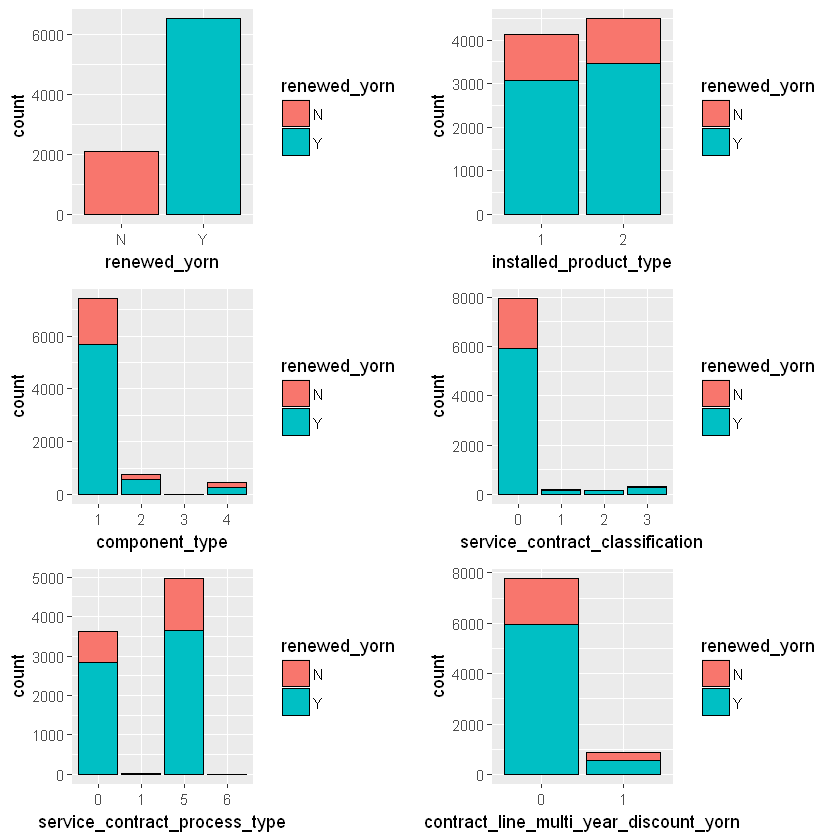

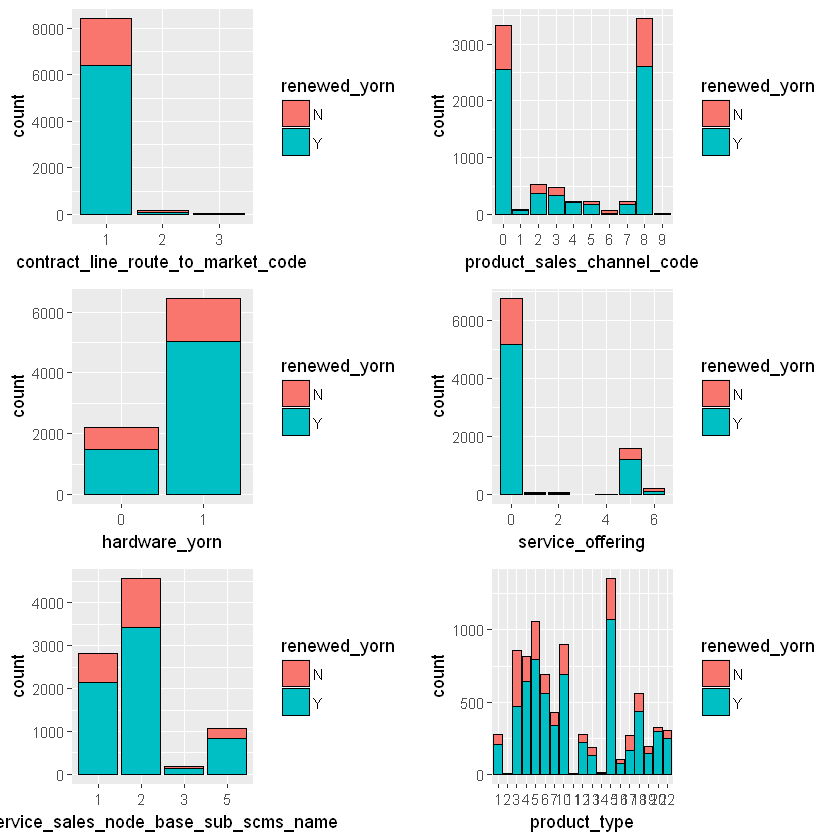

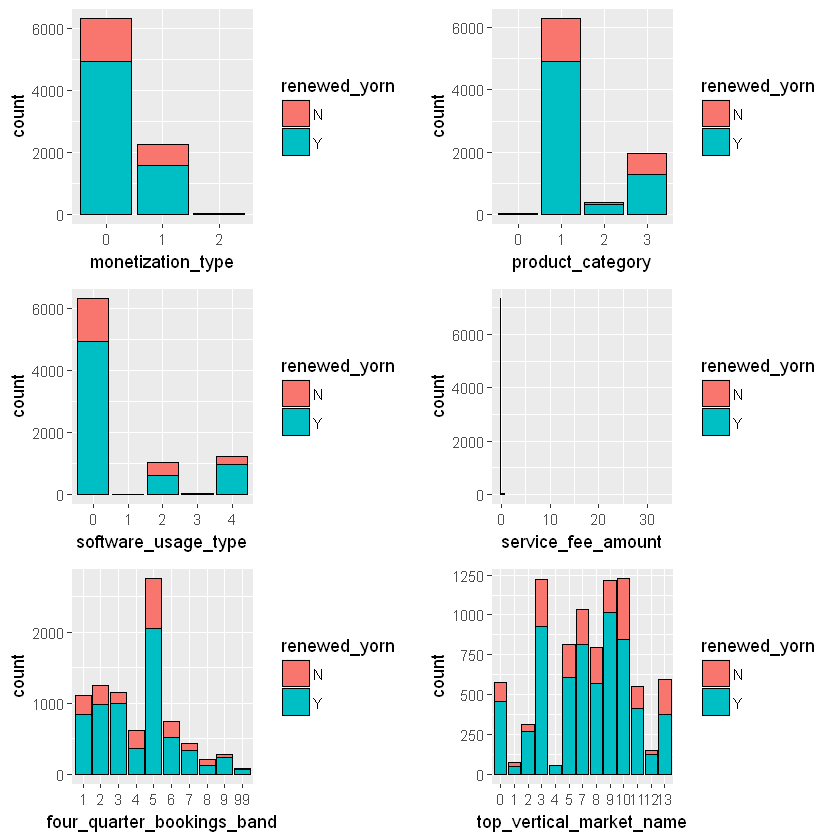

In [296]:
# ####### ****************************************************************************************************************
datasetGraph <- dataset
#
#par(mfrow=c(2,2))

#dev.copy(png,'postdataProcessing.png')

p1 <- ggplot(datasetGraph,aes(renewed_yorn)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p2 <- ggplot(datasetGraph,aes(installed_product_type)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p3 <- ggplot(datasetGraph,aes(component_type)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p4 <- ggplot(datasetGraph,aes(service_contract_classification)) +
      geom_bar() +
      geom_bar(aes(fill=renewed_yorn),color="black")
p5 <- ggplot(datasetGraph,aes(service_contract_process_type)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p6 <- ggplot(datasetGraph,aes(contract_line_multi_year_discount_yorn)) +
      geom_bar() +
      geom_bar(aes(fill=renewed_yorn),color="black")

grid.arrange(p1,p2,p3,p4,p5,p6, ncol=2,nrow=3)

#grid.arrange(p1,p2,p3,p4, ncol=2,nrow=2)

#grid.arrange(p1,p2,p3,p4, ncol=2,nrow=2, top=textGrob("AI innovation Plots", gp=gpar(fontsize=12, font = 2)))

p7 <- ggplot(datasetGraph,aes(contract_line_route_to_market_code)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p8 <- ggplot(datasetGraph,aes(product_sales_channel_code)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
#grid.arrange(p5,p6,p7,p8, ncol=2,nrow=2)
p9 <- ggplot(datasetGraph,aes(hardware_yorn)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p10 <- ggplot(datasetGraph,aes(service_offering)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p11 <- ggplot(datasetGraph,aes(service_sales_node_base_sub_scms_name)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
#p12 <- ggplot(datasetGraph,aes(business_unit)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p12 <- ggplot(datasetGraph)
p13 <- ggplot(datasetGraph,aes(product_type)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
#grid.arrange(p9,p10,p11,p12, ncol=2,nrow=2)

grid.arrange(p7,p8,p9,p10,p11,p13, ncol=2,nrow=3)

#p13 <- ggplot(datasetGraph,aes(product_type)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p14 <- ggplot(datasetGraph,aes(monetization_type)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p15 <- ggplot(datasetGraph,aes(product_category)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p16 <- ggplot(datasetGraph,aes(software_usage_type)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
#grid.arrange(p13,p14,p15,p16, ncol=2,nrow=2)
p17 <- ggplot(datasetGraph,aes(service_fee_amount)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p18 <- ggplot(datasetGraph) #+ geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
#p18 <- ggplot(datasetGraph,aes(service_product_base_product_sub_group)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")

#grid.arrange(p7,p8,p9,p10,p11, ncol=3,nrow=2)
p19 <- ggplot(datasetGraph,aes(four_quarter_bookings_band)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")
p20 <- ggplot(datasetGraph,aes(top_vertical_market_name)) + geom_bar() + geom_bar(aes(fill=renewed_yorn),color="black")

#grid.arrange(p17,p18,p19,p20, ncol=2,nrow=2)

grid.arrange(p14,p15,p16,p17,p19,p20, ncol=2,nrow=3)

#dev.off()
 #remove(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20)

In [297]:
ClassDistribution <- cbind(freq=table(dataset$renewed_yorn), percentage=prop.table(table(dataset$renewed_yorn))*100)
ClassDistribution

,freq,percentage
N,2101,24.35942
Y,6524,75.64058


In [298]:
# remove duplicate

dataset <- dataset[!duplicated(dataset),] # commented just now Ajay

print(cbind(freq=table(dataset$renewed_yorn), percentage=prop.table(table(dataset$renewed_yorn))*100))



  freq percentage
N 2101   24.35942
Y 6524   75.64058


In [299]:
# # fixing impalance data
#
 duplicateLabel <- function(dataset, label ='renewed_yorn', val ='N', reps =1){
   temp <- dataset[dataset[,label] == val, ]
   for(i in 1: reps){
     dataset <- rbind(dataset,temp)
   }
   dataset
 }
#
 dataset <- duplicateLabel(dataset)
#
print(cbind(freq=table(dataset$renewed_yorn), percentage=prop.table(table(dataset$renewed_yorn))*100))

  freq percentage
N 4202   39.17583
Y 6524   60.82417


In [300]:
# Final selected column
FinalTestColumnsSelected <- c('innovation_challenge_key','renewed_yorn','top_vertical_market_name','four_quarter_bookings_band','service_fee_amount','software_usage_type',
                              'product_type','service_sales_node_base_sub_scms_name','product_sales_channel_code','contract_line_multi_year_discount_yorn',
                              'service_contract_classification','installed_product_type')

FinalTestColumnsSelected

[1] "innovation_challenge_key"              
 [2] "renewed_yorn"                          
 [3] "top_vertical_market_name"              
 [4] "four_quarter_bookings_band"            
 [5] "service_fee_amount"                    
 [6] "software_usage_type"                   
 [7] "product_type"                          
 [8] "service_sales_node_base_sub_scms_name" 
 [9] "product_sales_channel_code"            
[10] "contract_line_multi_year_discount_yorn"
[11] "service_contract_classification"       
[12] "installed_product_type"

In [301]:
dataset <- dataset[FinalTestColumnsSelected]

In [302]:
# changing datatype
dataset$top_vertical_market_name <- as.numeric(dataset$top_vertical_market_name)
dataset$four_quarter_bookings_band <- as.numeric(dataset$four_quarter_bookings_band)
dataset$service_fee_amount <- as.numeric(dataset$service_fee_amount)
dataset$software_usage_type <- as.numeric(dataset$software_usage_type)
dataset$product_type <- as.numeric(dataset$product_type)
dataset$service_sales_node_base_sub_scms_name <- as.numeric(dataset$service_sales_node_base_sub_scms_name)
dataset$product_sales_channel_code <- as.numeric(dataset$product_sales_channel_code)
dataset$contract_line_multi_year_discount_yorn <- as.numeric(dataset$contract_line_multi_year_discount_yorn)
dataset$service_contract_classification <- as.numeric(dataset$service_contract_classification)
dataset$installed_product_type <- as.numeric(dataset$installed_product_type)

In [303]:
sapply(dataset, class)

innovation_challenge_key                           renewed_yorn 
                             "integer"                            "character" 
              top_vertical_market_name             four_quarter_bookings_band 
                             "numeric"                              "numeric" 
                    service_fee_amount                    software_usage_type 
                             "numeric"                              "numeric" 
                          product_type  service_sales_node_base_sub_scms_name 
                             "numeric"                              "numeric" 
            product_sales_channel_code contract_line_multi_year_discount_yorn 
                             "numeric"                              "numeric" 
       service_contract_classification                 installed_product_type 
                             "numeric"                              "numeric"

In [304]:
### Training & test dataset

set.seed(123)   

split = sample.split(dataset$renewed_yorn, SplitRatio = 0.75)
#split = sample.split(dataset$renewed_yorn, SplitRatio = 0.98)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)


In [305]:
head(test_set)

innovation_challenge_key,renewed_yorn,top_vertical_market_name,four_quarter_bookings_band,service_fee_amount,software_usage_type,product_type,service_sales_node_base_sub_scms_name,product_sales_channel_code,contract_line_multi_year_discount_yorn,service_contract_classification,installed_product_type
6019776,N,8,4,-0.1267286,3,3,2,9,1,1,2
4366777,N,8,4,-0.1267286,3,3,2,9,1,1,1
7840051,N,8,4,-0.1267286,3,3,2,9,1,1,1
6421723,N,8,4,-0.1267286,4,3,2,9,1,1,1
406430,N,8,4,-0.1267286,3,3,2,9,1,1,1
5468976,N,8,4,-0.1267286,3,3,2,9,1,1,1


# Build model

1. Accuracy

In [306]:
# Build model

## metric--> Accuracy

trainControl <- trainControl(method="cv", number=5)

classification <- train(renewed_yorn~.,training_set,method="rf", trControl=trainControl,metric="Accuracy",ntree=500)

classification

Random Forest 

8045 samples
  11 predictor
   2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6437, 6437, 6436, 6435, 6435 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8090748  0.5817433
   6    0.8495969  0.6879909
  11    0.8500937  0.6897689

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 11.

In [307]:
print(classification$finalModel)


Call:
 randomForest(x = x, y = y, ntree = 500, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 11

        OOB estimate of  error rate: 12.21%
Confusion matrix:
     N    Y class.error
N 2842  310  0.09835025
Y  672 4221  0.13733906


# log loss

In [308]:
set.seed(123)
## metric--> logLoss
trainControl <- trainControl(method="cv", number=5,classProbs=TRUE, summaryFunction=mnLogLoss)
classification <- train(renewed_yorn~.,training_set,method="rf", metric="logLoss",trControl=trainControl,ntree=500)

classification


Random Forest 

8045 samples
  11 predictor
   2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6437, 6436, 6435, 6435, 6437 
Resampling results across tuning parameters:

  mtry  logLoss  
   2    0.4128476
   6    0.3648730
  11    0.3870789

logLoss was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 6.

In [309]:
print(classification$finalModel)


Call:
 randomForest(x = x, y = y, ntree = 500, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 13.26%
Confusion matrix:
     N    Y class.error
N 2767  385   0.1221447
Y  682 4211   0.1393828


# rpart tree plot

In [310]:
###********************************** rpart tree plot  *****************************************
set.seed(123)

classifierRpart <- rpart(renewed_yorn~.,data = dataset,method='class')

print(classifierRpart)

#y_pred_Rpart <- predict(classifierRpart,training_set[-2])




n= 10726 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 10726 4202 Y (0.39175834 0.60824166)  
   2) product_type< 3.5 1590  682 N (0.57106918 0.42893082)  
     4) top_vertical_market_name>=7.5 1063  293 N (0.72436500 0.27563500) *
     5) top_vertical_market_name< 7.5 527  138 Y (0.26185958 0.73814042) *
   3) product_type>=3.5 9136 3294 Y (0.36055166 0.63944834)  
     6) contract_line_multi_year_discount_yorn>=1.5 1075  521 N (0.51534884 0.48465116)  
      12) top_vertical_market_name< 6.5 496  140 N (0.71774194 0.28225806) *
      13) top_vertical_market_name>=6.5 579  198 Y (0.34196891 0.65803109) *
     7) contract_line_multi_year_discount_yorn< 1.5 8061 2740 Y (0.33990820 0.66009180)  
      14) top_vertical_market_name>=9.5 2412 1018 Y (0.42205638 0.57794362)  
        28) four_quarter_bookings_band>=7.5 94    4 N (0.95744681 0.04255319) *
        29) four_quarter_bookings_band< 7.5 2318  928 Y (0.40034513 0.59965487) *
      15) top_vertical_m

In [311]:
printcp(classifierRpart) # display the results 


Classification tree:
rpart(formula = renewed_yorn ~ ., data = dataset, method = "class")

Variables actually used in tree construction:
[1] contract_line_multi_year_discount_yorn
[2] four_quarter_bookings_band            
[3] product_type                          
[4] top_vertical_market_name              

Root node error: 4202/10726 = 0.39176

n= 10726 

        CP nsplit rel error  xerror     xstd
1 0.056759      0   1.00000 1.00000 0.012031
2 0.025702      2   0.88648 0.88648 0.011735
3 0.010233      4   0.83508 0.84055 0.011583
4 0.010000      6   0.81461 0.83103 0.011549


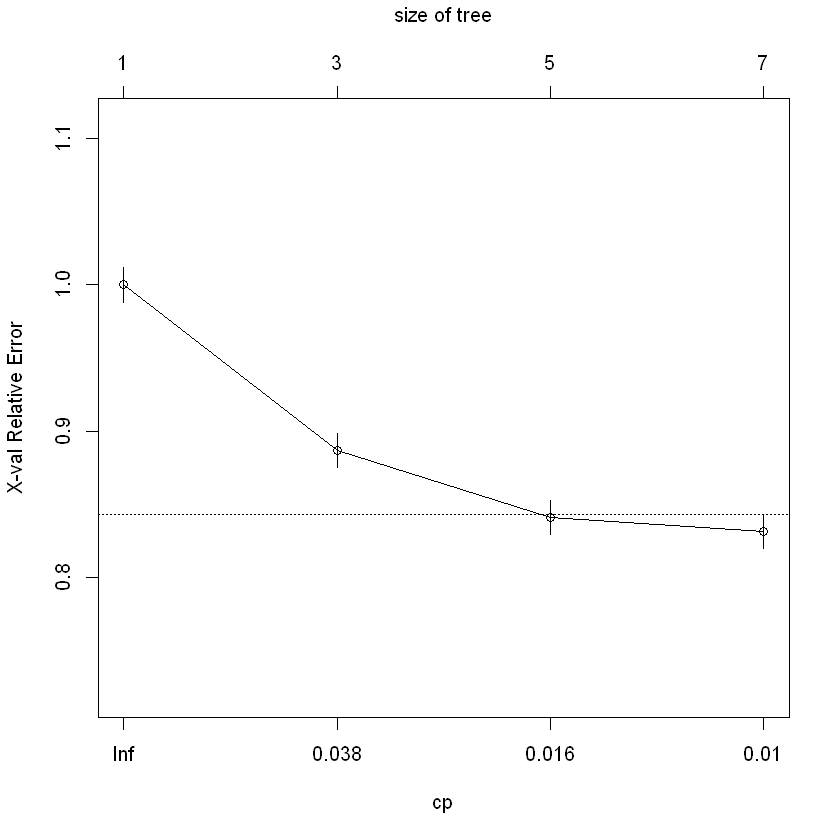

In [316]:
#dev.copy(png,'Tree.png')
plotcp(classifierRpart) # visualize cross-validation results
#dev.off()

In [317]:
summary(classifierRpart) # detailed summary of splits

Call:
rpart(formula = renewed_yorn ~ ., data = dataset, method = "class")
  n= 10726 

          CP nsplit rel error    xerror       xstd
1 0.05675869      0 1.0000000 1.0000000 0.01203123
2 0.02570205      2 0.8864826 0.8864826 0.01173460
3 0.01023322      4 0.8350785 0.8405521 0.01158299
4 0.01000000      6 0.8146121 0.8310328 0.01154919

Variable importance
              top_vertical_market_name                           product_type 
                                    49                                     22 
            four_quarter_bookings_band contract_line_multi_year_discount_yorn 
                                    13                                     11 
       service_contract_classification                     service_fee_amount 
                                     2                                      1 
            product_sales_channel_code               innovation_challenge_key 
                                     1                                      1 

Node

# Plot Tree

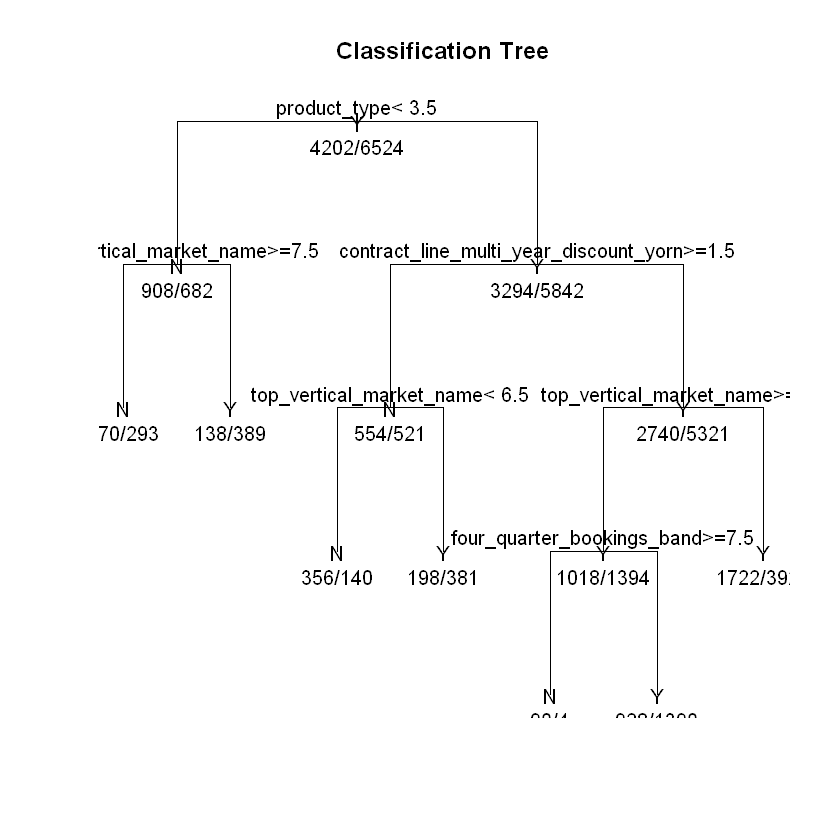

In [319]:
# plot tree 
#dev.copy(png,'ClassificationTree.png')
plot(classifierRpart, uniform=TRUE, 
     main="Classification Tree")
text(classifierRpart, use.n=TRUE, all=TRUE, cex=1)
#dev.off()

# Final Model




In [162]:
# Final Model

#trainControl <- trainControl(method="cv", number=5) # 5
set.seed(123)

trainControl <- trainControl(method="cv", number=5,savePredictions=TRUE, classProbs=TRUE)

FinalClassifier <- train(renewed_yorn~.,training_set,method="rf", trControl=trainControl, metric="Accuracy",ntree=500)

print(FinalClassifier)


Random Forest 

8045 samples
  11 predictor
   2 classes: 'N', 'Y' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6437, 6436, 6435, 6435, 6437 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8052194  0.5732757
   6    0.8539440  0.6965635
  11    0.8534454  0.6960767

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.


In [187]:
# Save model to disk

#saveRDS(FinalClassifier,"FinalClassifierModelsmallds.rds")

In [252]:
dev.copy(png,'PredictorAccuracy.jpg')
plot(FinalClassifier)
dev.off()

png 
  5

png 
  2

In [164]:
print(FinalClassifier$finalModel)


Call:
 randomForest(x = x, y = y, ntree = 500, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 13.26%
Confusion matrix:
     N    Y class.error
N 2767  385   0.1221447
Y  682 4211   0.1393828


# Prediction: on test dataset based on final model


- Load model from disk

In [195]:
# Load the model

FinalClassifier <- readRDS("FinalClassifierModelsmallds.rds")

#FinalClassifier <- readRDS("FinalClassifierBigDS.rds")



In [196]:
finalPredictions <- predict(FinalClassifier, test_set)
confusionMatrix(finalPredictions, as.factor(test_set$renewed_yorn)) ## both should be factor




Confusion Matrix and Statistics

          Reference
Prediction    N    Y
         N  916  218
         Y  134 1413
                                          
               Accuracy : 0.8687          
                 95% CI : (0.8553, 0.8813)
    No Information Rate : 0.6084          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7283          
 Mcnemar's Test P-Value : 9.693e-06       
                                          
            Sensitivity : 0.8724          
            Specificity : 0.8663          
         Pos Pred Value : 0.8078          
         Neg Pred Value : 0.9134          
             Prevalence : 0.3916          
         Detection Rate : 0.3417          
   Detection Prevalence : 0.4230          
      Balanced Accuracy : 0.8694          
                                          
       'Positive' Class : N               
                                          

## Prediction result output

In [197]:
## Prepare result output ***
ResultSummary <- cbind(test_set,finalPredictions)

ResultSummary$Prediction <- as.factor(ifelse(as.character(ResultSummary$renewed_yorn) == as.character(ResultSummary$finalPredictions), 'Correct','Incorrect'))

write.table(ResultSummary, file = "ResultSummaryTest_set.csv", sep = ',',row.names = FALSE)

table(ResultSummary$Prediction)


  Correct Incorrect 
     2329       352 

# Test with New dataset

In [182]:
#finalPredictions <- predict(FinalClassifier, dataset)
#confusionMatrix(finalPredictions, as.factor(dataset$renewed_yorn)) ## both should be factor

In [183]:
# New dataset 

#ResultSummaryNewDS <- cbind(dataset,finalPredictions)

#ResultSummaryNewDS$Prediction <- as.factor(ifelse(as.character(ResultSummaryNewDS$renewed_yorn) == as.character(ResultSummaryNewDS$finalPredictions), 'Correct','Incorrect'))

#write.table(ResultSummaryNewDS, file = "ResultSummaryNewDS.csv", sep = ',',row.names = FALSE)

#table(ResultSummaryNewDS$Prediction)